# ***EMPLOYEE BURNOUT PREDICTION***

# **Data Preprocessing**

### **1). Importing necessary python libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

### **2). Dataset Loading**

In [ ]:
data=pd.read_excel("/content/Employee_Burnout_Analysis-AI.xlsx")

### **3). Dataset Overview**

In [ ]:
data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52


In [ ]:
data.shape

(22750, 9)

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [ ]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


### **4). Removing Irrelevant Features**

In [ ]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

*The Employee ID doesn't provide any useful information and it doesn't effect the Burn Rate. So, it can be removed*

In [ ]:
data=data.drop('Employee ID',axis=1)

In [ ]:
data.columns.tolist()

['Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

### **5). Handling Missing Values**

In [ ]:
data.isnull().sum()

,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [ ]:
data=data.dropna()

In [ ]:
data.isna().sum()

,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,0
Mental Fatigue Score,0
Burn Rate,0


In [ ]:
data.shape

(18590, 8)

# **Exploratory Data Analysis**

### **1). Data Visualization**

In [ ]:
data.nunique()

,0
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [ ]:
data['Date of Joining'].value_counts()

,count
Date of Joining,
2008-01-06,73
2008-01-29,68
2008-09-28,66
2008-06-11,66
2008-07-16,66
...,...
2008-12-24,36
2008-06-27,35
2008-08-03,33


In [ ]:
data['Gender'].value_counts()

,count
Gender,
Female,9747
Male,8843


In [ ]:
data['Company Type'].value_counts()

,count
Company Type,
Service,12174
Product,6416


In [ ]:
data['WFH Setup Available'].value_counts()

,count
WFH Setup Available,
Yes,10030
No,8560


In [ ]:
data['Designation'].value_counts()

,count
Designation,
2,6214
3,4920
1,3954
4,1947
0,1238
5,317


In [ ]:
data['Resource Allocation'].value_counts()

,count
Resource Allocation,
4.0,3396
5.0,3364
3.0,2761
6.0,2590
2.0,1794
7.0,1697
1.0,1551
8.0,907
9.0,396


In [ ]:
data['Mental Fatigue Score'].value_counts()

,count
Mental Fatigue Score,
6.0,429
5.9,413
6.3,410
6.1,406
5.8,406
...,...
0.2,20
0.6,20
0.4,15


In [ ]:
data['Burn Rate'].value_counts()

,count
Burn Rate,
0.47,416
0.43,382
0.45,379
0.50,369
0.41,365
...,...
0.98,17
0.95,16
0.97,11


### **2). Outlier Detection and Removal**

In [ ]:
data.dtypes

,0
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


*We could only detect outliers for numerical values. So, We are detecting outliers for only Designation, Resource Allocation, Mental Fatigue Score and Burn Rate*

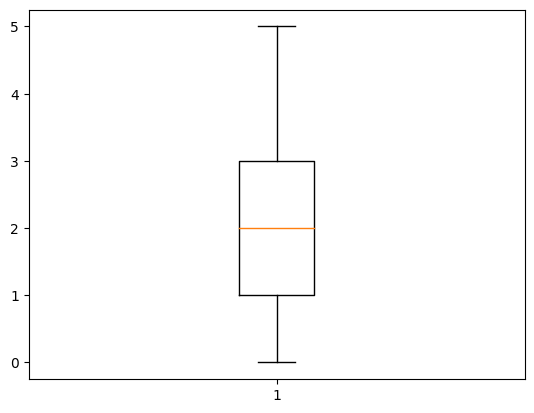

In [ ]:
plt.boxplot(data['Designation'])
plt.show()

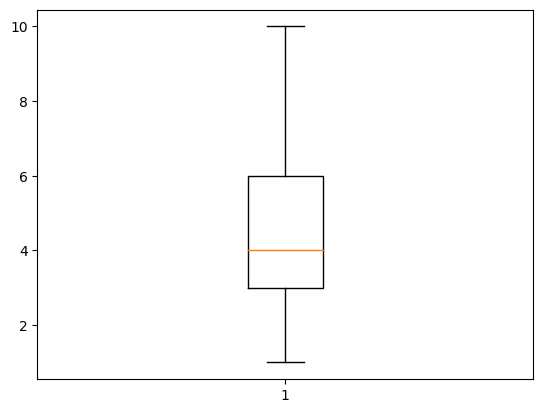

In [ ]:
plt.boxplot(data['Resource Allocation'])
plt.show()

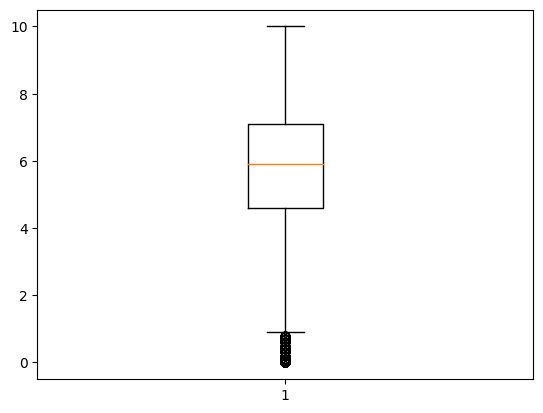

In [ ]:
plt.boxplot(data['Mental Fatigue Score'])
plt.show()

In [ ]:
data=data[data['Mental Fatigue Score']>=0.9]

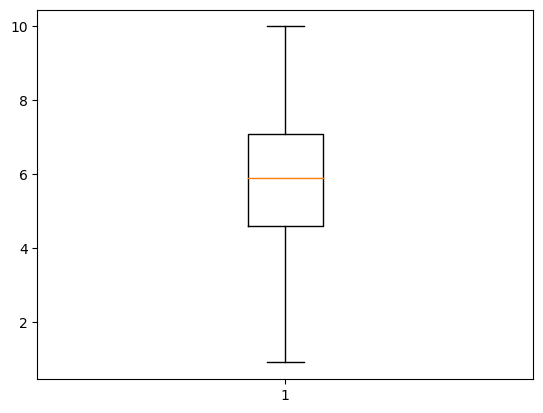

In [ ]:
plt.boxplot(data['Mental Fatigue Score'])
plt.show()

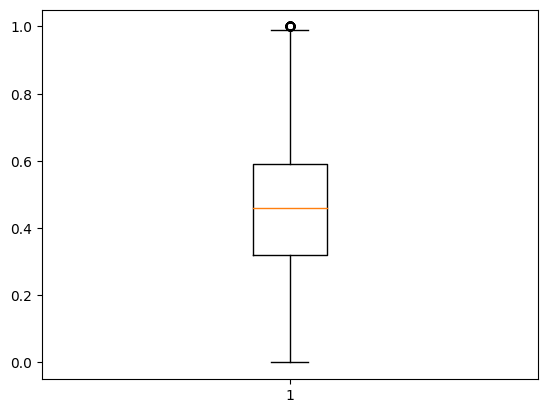

In [ ]:
plt.boxplot(data['Burn Rate'])
plt.show()

In [ ]:
data=data[(data['Burn Rate']<=0.99)]

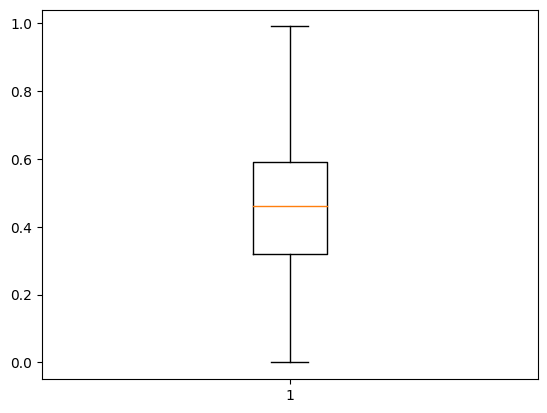

In [ ]:
plt.boxplot(data['Burn Rate'])
plt.show()

In [ ]:
data.shape

(18215, 8)

### **3). Transforming Categorical variables into numerical values**

In [ ]:
data.dtypes

,0
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


*From this, We came to know that, Gender, Company Type and WFH Setup Available are the only columns that contains categorical values. So, we have to transform them into numericals using Label Encoder.*

In [ ]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
data['Company Type']=le.fit_transform(data['Company Type'])
data['WFH Setup Available']=le.fit_transform(data['WFH Setup Available'])

In [ ]:
data.dtypes

,0
Date of Joining,datetime64[ns]
Gender,int64
Company Type,int64
WFH Setup Available,int64
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


### **4). Finding the correlation between numeric columns and the Burn Rate**

In [ ]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Gender,0.159454
Company Type,0.003784
WFH Setup Available,-0.314860
Designation,0.719458
Resource Allocation,0.845620
Mental Fatigue Score,0.941141


*Out of all the above variables, We can observe that, Only Mental Fatigue Score, Resource Allocation and Designation are strongly correlated with the Burn Rate. We can observe the same in the following graph as well.*

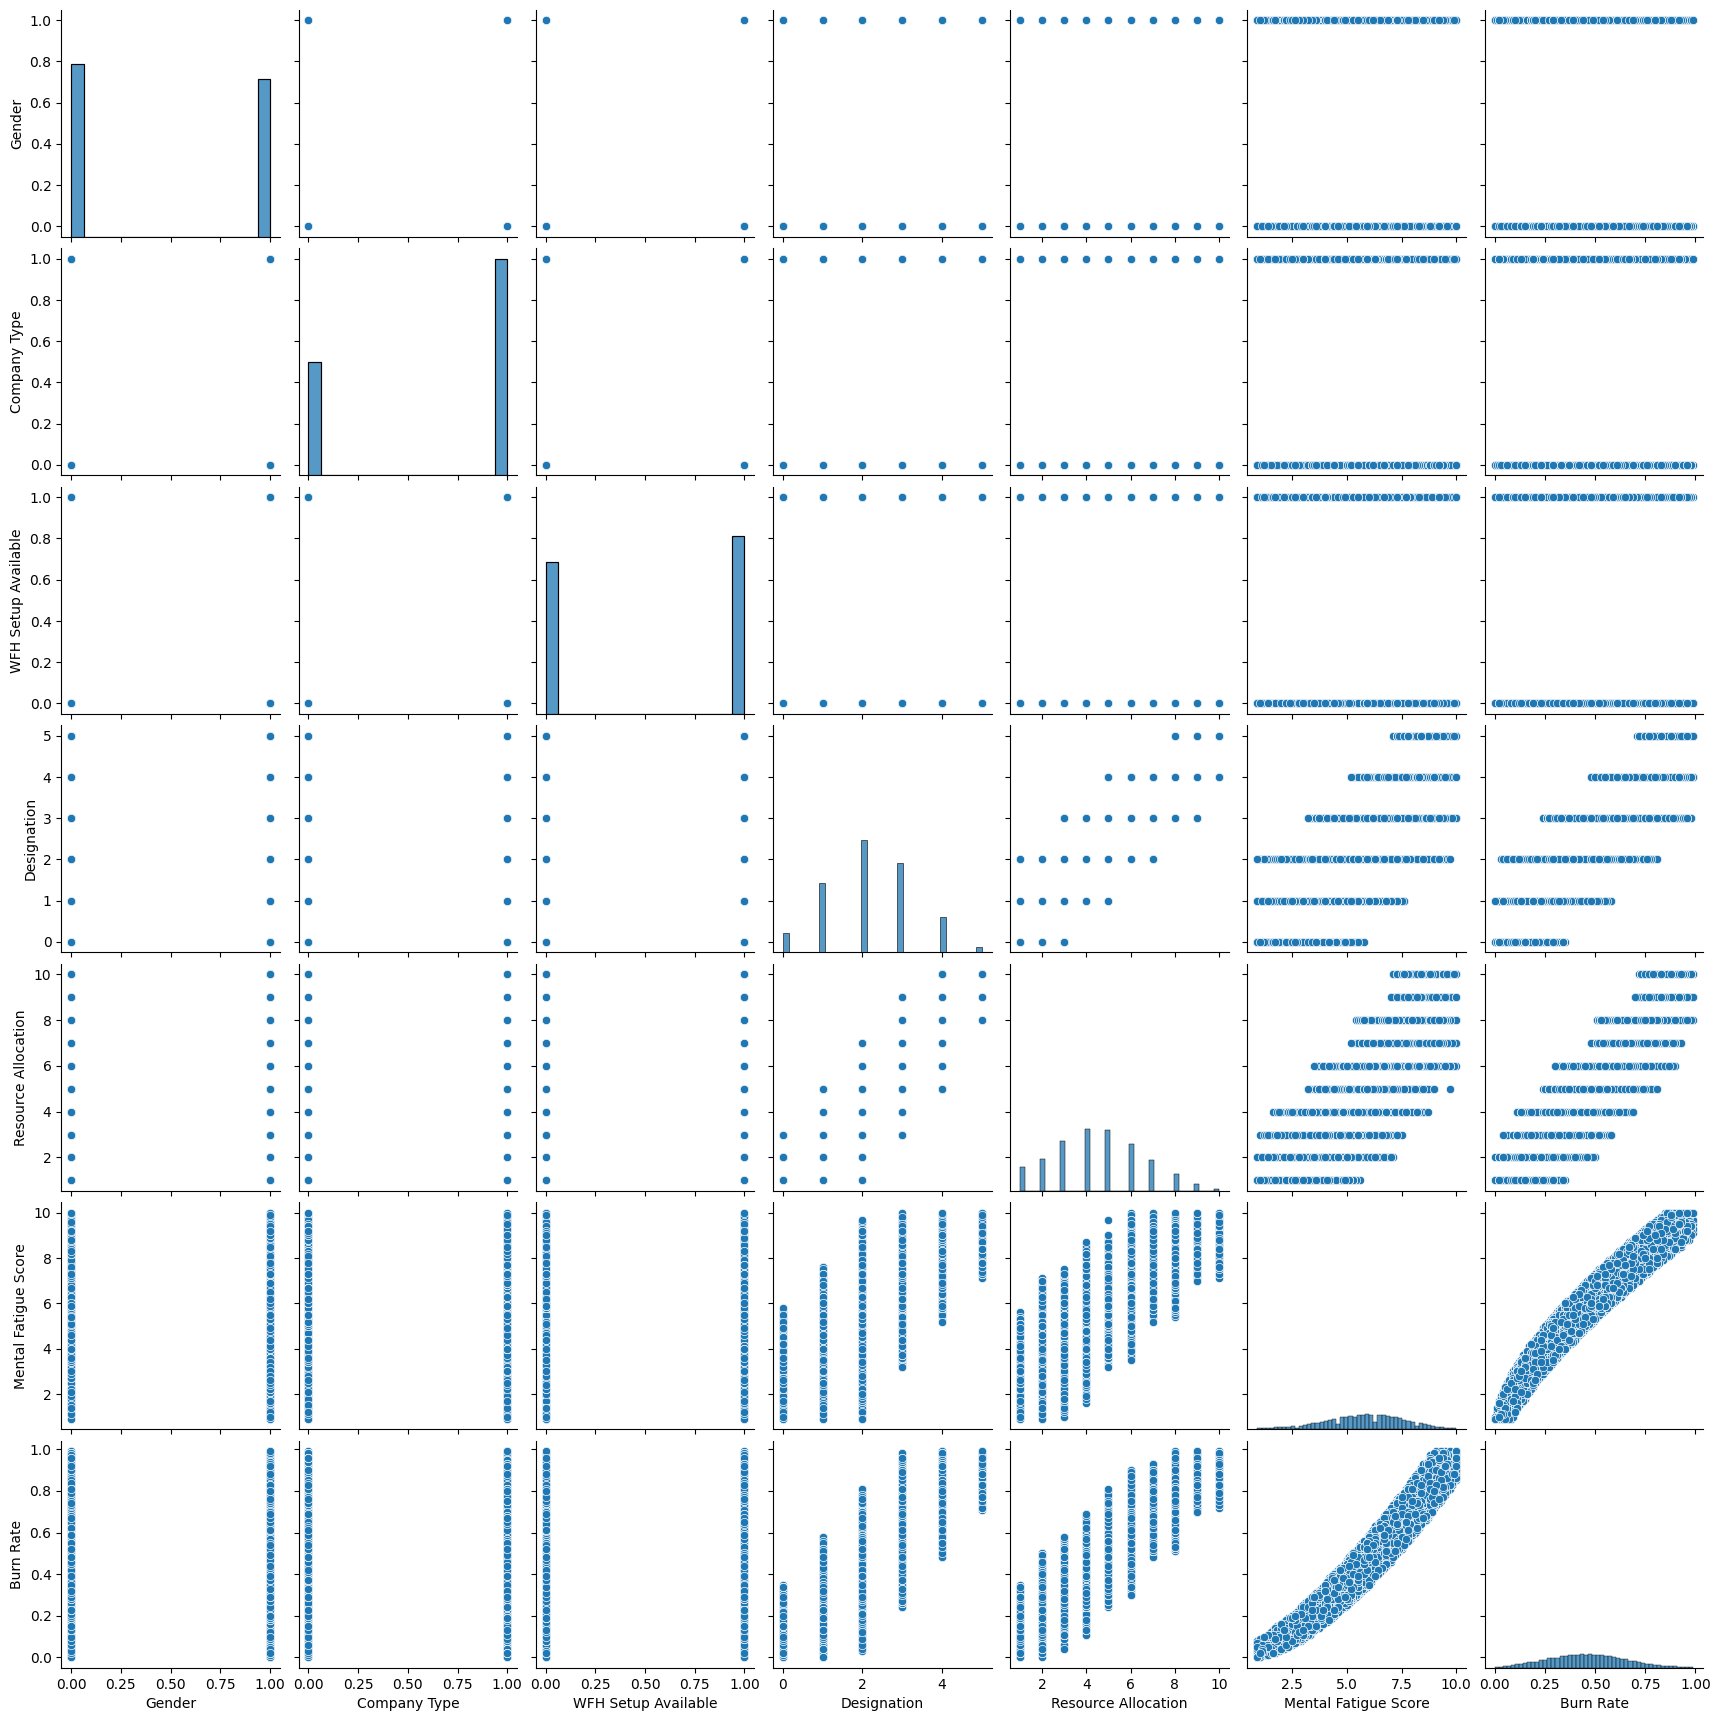

In [ ]:
sns.pairplot(data)
plt.show()

### **5). Checking the correlation between Date of Joining and the Target variable (Burn Rate)**

*To achieve this, We need to find every employee's seniority.*

In [ ]:
data.dtypes

,0
Date of Joining,datetime64[ns]
Gender,int64
Company Type,int64
WFH Setup Available,int64
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


*As Date of Joining is of type datetime64[ns], It is hard for us to determine correlation. So, We have to create a new feature having numerical values that represents labor seniority. i.e.., Days.*

In [ ]:
data_2008=pd.to_datetime(["2008-01-01"]*len(data))
data["Days"]=data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days

In [ ]:
data.dtypes

,0
Date of Joining,datetime64[ns]
Gender,int64
Company Type,int64
WFH Setup Available,int64
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64
Days,int64


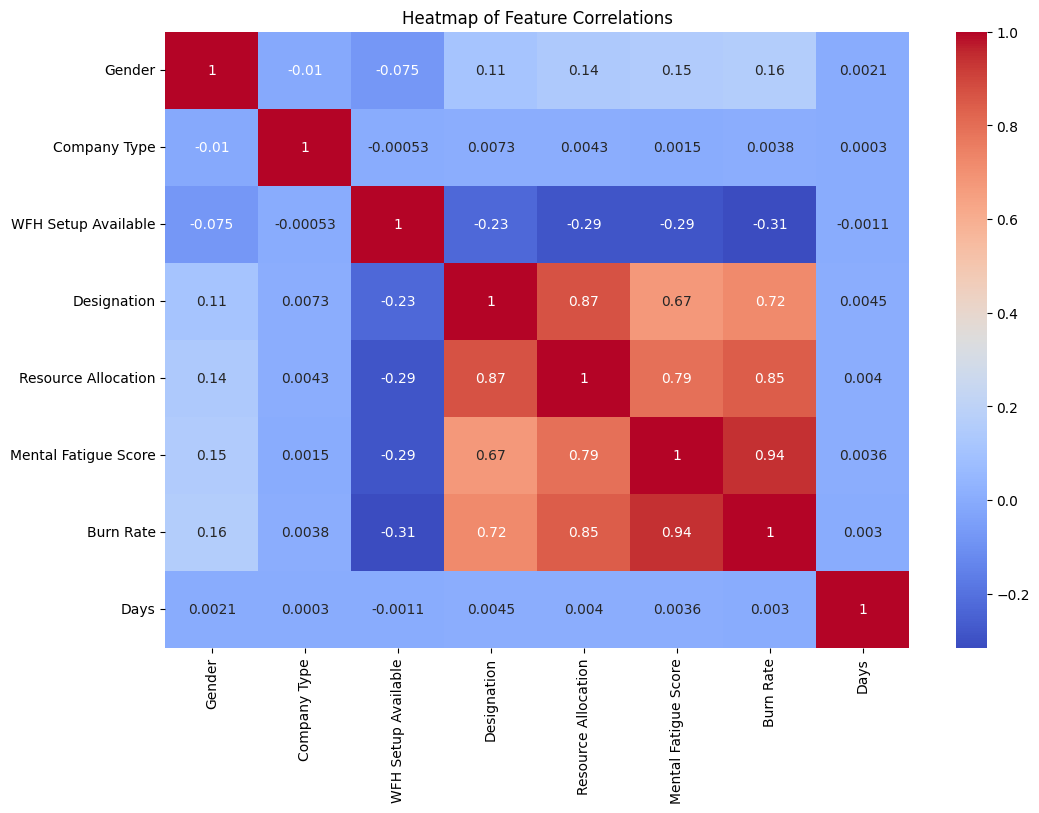

In [ ]:
correlation_heatmap=data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_heatmap,annot=True,cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

*Here, We can observe the blue colour corresponding to Gender, Company Type, WFH Setup Available and Days column. This means, Correlation of those columns with our target variable is very weak.*

In [ ]:
numeric_data=data.select_dtypes(include=np.number)
numeric_data.corr()['Burn Rate']

,Burn Rate
Gender,0.159454
Company Type,0.003784
WFH Setup Available,-0.314860
Designation,0.719458
Resource Allocation,0.845620
Mental Fatigue Score,0.941141
Burn Rate,1.000000
Days,0.003017


*As the Correlation values of Gender, Company Type, WFH Setup Available and Days columns with the Burn Rate are very low compared to the other columns, We can drop them, as well as Date of Joining column (Same as Days).*

***NOTE: Building a model by assuming Designation column as a predictor variable, resulting in a negative Coefficient value for the Designation column (that too, near to 0). So, Dropping Desgination column too.***

In [ ]:
data=data.drop(['Date of Joining','Gender','Company Type','WFH Setup Available','Designation','Days'],axis=1)

In [ ]:
data.columns.tolist()

['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']

# **Data Preparation**

### **1). Splitting the data into Input and Output**

In [ ]:
Output=data['Burn Rate']
Input=data.drop('Burn Rate',axis=1)

In [ ]:
Input

,Resource Allocation,Mental Fatigue Score
0,3.0,3.8
1,2.0,5.0
3,1.0,2.6
4,7.0,6.9
5,4.0,3.6
...,...,...
22743,3.0,6.0
22744,7.0,6.2
22746,6.0,6.7
22748,5.0,5.9


In [ ]:
Output

,Burn Rate
0,0.16
1,0.36
3,0.20
4,0.52
5,0.29
...,...
22743,0.48
22744,0.54
22746,0.59
22748,0.52


### **2). Splitting the data for Training and Testing**

In [ ]:
train_input,test_input,train_output,test_output=train_test_split(Input,Output,test_size=0.2,shuffle=True,random_state=42)

In [ ]:
train_input

,Resource Allocation,Mental Fatigue Score
21861,3.0,6.1
9924,6.0,7.6
15246,1.0,3.2
5642,5.0,7.1
223,4.0,6.1
...,...,...
14138,5.0,5.2
14993,6.0,6.8
6714,4.0,5.6
1073,2.0,3.5


In [ ]:
train_output

,Burn Rate
21861,0.38
9924,0.54
15246,0.27
5642,0.51
223,0.47
...,...
14138,0.42
14993,0.54
6714,0.34
1073,0.15


In [ ]:
test_input

,Resource Allocation,Mental Fatigue Score
16752,6.0,7.7
13120,3.0,4.2
15001,5.0,7.4
10546,5.0,6.0
2454,8.0,8.3
...,...,...
10429,7.0,7.7
1990,4.0,6.6
19609,7.0,7.8
14685,2.0,4.3


In [ ]:
test_output

,Burn Rate
16752,0.63
13120,0.33
15001,0.62
10546,0.46
2454,0.87
...,...
10429,0.61
1990,0.43
19609,0.60
14685,0.23


### **3). Scaling the Input data**

In [ ]:
Scaler=StandardScaler()
train_input=Scaler.fit_transform(train_input)
test_input=Scaler.transform(test_input)

In [ ]:
train_input

array([[-0.76610164,  0.15520347],
       [ 0.72829394,  0.9937948 ],
       [-1.76236536, -1.46607311],
       ...,
       [-0.26796978, -0.12432698],
       [-1.2642335 , -1.29835484],
       [ 0.23016208,  0.37882782]])

In [ ]:
test_input

array([[ 0.72829394,  1.04970089],
       [-0.76610164, -0.90701222],
       [ 0.23016208,  0.88198262],
       ...,
       [ 1.2264258 ,  1.10560698],
       [-1.2642335 , -0.85110613],
       [ 1.72455766,  0.49064   ]])

# **Model Building (Linear Regression)**

### **1). Training the Model**

In [ ]:
Linear_Regression=LinearRegression()
Linear_Regression.fit(train_input,train_output)

LinearRegression()

### **2). Evaluating the Model**

In [ ]:
print("Linear Regression Model Performance Metrics:\n")
print("Mean Squared Error:",mean_squared_error(test_output,Linear_Regression.predict(test_input)))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(test_output,Linear_Regression.predict(test_input))))
print("Mean Absolute Error:",mean_absolute_error(test_output,Linear_Regression.predict(test_input)))
print("R2 Score:",r2_score(test_output,Linear_Regression.predict(test_input)))

Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031610268081441327
Root Mean Squared Error: 0.05622300959699803
Mean Absolute Error: 0.04610223307072745
R2 Score: 0.9075239797484418


# **Model Validation (Linear Regression)**

### **1). Determining the Coefficients**

In [ ]:
print("Coefficients:",Linear_Regression.coef_)

Coefficients: [0.05162448 0.13716713]


In [ ]:
data

,Resource Allocation,Mental Fatigue Score,Burn Rate
0,3.0,3.8,0.16
1,2.0,5.0,0.36
3,1.0,2.6,0.20
4,7.0,6.9,0.52
5,4.0,3.6,0.29
...,...,...,...
22743,3.0,6.0,0.48
22744,7.0,6.2,0.54
22746,6.0,6.7,0.59
22748,5.0,5.9,0.52


### **2). Calculating Intercept**

In [ ]:
print("Intercept:",Linear_Regression.intercept_)

Intercept: 0.45933365358221245


### **3). Coefficients - Inputs Graph**

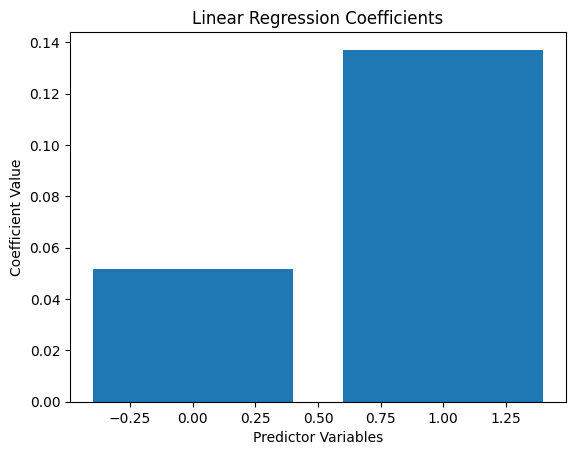

In [ ]:
train_input = pd.DataFrame(train_input)

plt.bar(train_input.columns,Linear_Regression.coef_)
plt.title('Linear Regression Coefficients')
plt.xlabel('Predictor Variables')
plt.ylabel('Coefficient Value')
plt.show()

Here,
*   0 ---> Resource Allocation (Working Hours) ---> 0.05162448
*   1 ---> Mental Fatigue Score (Mental Stress) ---> 0.13716713

# **Model Building (Random Forests)**

### **1). Training the Model**

In [ ]:
Random_Forest=RandomForestRegressor()
Random_Forest.fit(train_input,train_output)

RandomForestRegressor()

### **2). Evaluating the Model**

In [ ]:
print("Random Forest Regressor Model Performance Metrics:\n")
print("Mean Squared Error:",mean_squared_error(test_output,Random_Forest.predict(test_input)))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(test_output,Random_Forest.predict(test_input))))
print("Mean Absolute Error:",mean_absolute_error(test_output,Random_Forest.predict(test_input)))
print("R2 Score:",r2_score(test_output,Random_Forest.predict(test_input)))

Random Forest Regressor Model Performance Metrics:

Mean Squared Error: 0.0030864437292590246
Root Mean Squared Error: 0.05555577134068993
Mean Absolute Error: 0.04549553867417799
R2 Score: 0.909705911991355


# **Model Validation (Random Forests)**

### **1). Determining the Feature Importances**

In [ ]:
feature_importances = pd.DataFrame({'Feature': Input.columns, 'Importance': Random_Forest.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

print(feature_importances)

                Feature  Importance
1  Mental Fatigue Score    0.959376
0   Resource Allocation    0.040624


### **2). Feature - Importance Graph**

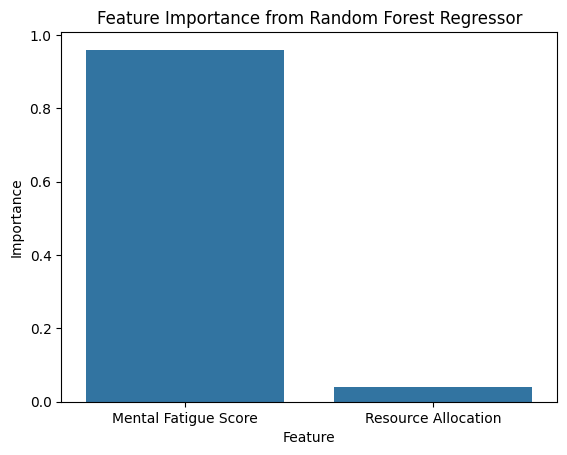

In [ ]:
sns.barplot(x='Feature', y='Importance', data=feature_importances)
plt.title('Feature Importance from Random Forest Regressor')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

Here,
*   Resource Allocation (Working Hours) ---> 0.040953
*   Mental Fatigue Score (Mental Stress) ---> 0.959047

# **Model Building (Gradient Boosting Machines)**

### **1). Training the Model**

In [ ]:
gbm=GradientBoostingRegressor()
gbm.fit(train_input,train_output)

GradientBoostingRegressor()

### **2). Evaluating the Model**

In [ ]:
print("Gradient Boosting Regressor Model Performance Metrics:\n")
print("Mean Squared Error:",mean_squared_error(test_output,gbm.predict(test_input)))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(test_output,gbm.predict(test_input))))
print("Mean Absolute Error:",mean_absolute_error(test_output,gbm.predict(test_input)))
print("R2 Score:",r2_score(test_output,gbm.predict(test_input)))

Gradient Boosting Regressor Model Performance Metrics:

Mean Squared Error: 0.0030313809117573564
Root Mean Squared Error: 0.055057977730364895
Mean Absolute Error: 0.045150494208636906
R2 Score: 0.9113167778698957


# **Model Validation (Gradient Boosting Machines)**

### **1). Determining the Feature Importances**

In [ ]:
feature_importances = pd.DataFrame({'Feature': Input.columns, 'Importance': gbm.feature_importances_})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

print(feature_importances)

                Feature  Importance
1  Mental Fatigue Score    0.921062
0   Resource Allocation    0.078938


### **2). Feature - Importance Graph**

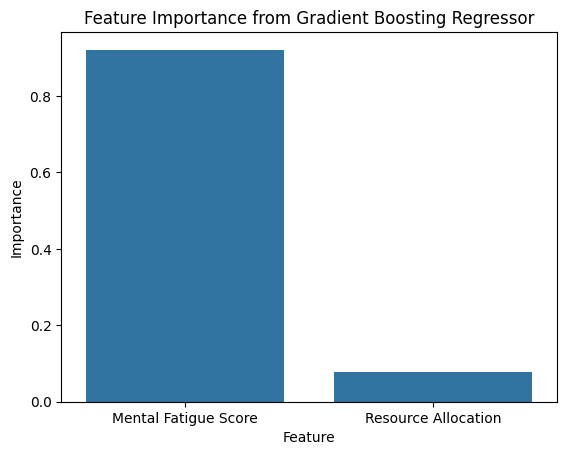

In [ ]:
sns.barplot(x='Feature', y='Importance', data=feature_importances)
plt.title('Feature Importance from Gradient Boosting Regressor')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

Here,
*   Resource Allocation (Working Hours) ---> 0.078938
*   Mental Fatigue Score (Mental Stress) ---> 0.921062

### ***By using all the above models, We came to know that, Burn Rate is mostly influenced by Mental Fatigue Score and Resource Allocation rather than Designation.***

### ***Therefore, In order to reduce the Burn Rate of most of the employees, We need to reduce their Mental Fatigue Score and Resource Allocation by taking appropriate actions.***

# ***THANK YOU***